## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


STEP 1: SET UP ENVIRONMENT & GET DATA 

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
#import data into pd dataframe 
kc_data = pd.read_csv('kc_house_data.csv')

STEP 2: INSPECT DATA

In [4]:
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Upon inspecting our data, we noticed that there are 3 columns with NULL values: waterfront, view, and yr_renovated.

In [6]:
#Check to see if any duplicate ids 
kc_data.duplicated(subset=['id']).any()

True

In [7]:
#Identify the duplicated values to determine which one to remove from dataset 
pd.concat(g for _, g in kc_data.groupby('id') if len(g) > 1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
12405,123039336,6/11/2014,148000.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,0.0,98106,47.5138,-122.364,1180,8244
12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244
7785,251300110,7/31/2014,225000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017
7786,251300110,1/14/2015,358000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017


We decided to keep the id in repeated ids that has the later sell date b/c its price would be more relevant to current market conditions and the attributes of the house are the same (except for waterfront on occasion because we sub-ed in null values ) for both times. 

In [8]:
#Remove duplicates; keep the last duplicated as more relevant 
kc_data.drop_duplicates(subset='id', keep='last', inplace=True)

In [9]:
#Check to ensure duplicated data has been removed
kc_data.duplicated(subset=['id']).any()

False

In [10]:
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,19067.000000,21357.000000,21420.000000,21420.000000,21420.000000,21420.000000,17607.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007657,0.234677,3.410784,7.662792,1791.170215,1971.092997,83.890101,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087172,0.766459,0.650035,1.171971,828.692965,29.387141,400.534473,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


Next, we will deal with categorical variables. Based on the mean and range shown in the tables, we realized that grade and condition of home are categorical variables. We are going to change them to dummy variables 

In [11]:
#Checking for range of values in categorical variables 
kc_data['condition'].unique()

array([3, 5, 4, 1, 2])

In [12]:
kc_data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [13]:
# create new columns of dummy variable; drop first value so we have n-1 values 
condition_dummies = pd.get_dummies(kc_data['condition'],prefix = 'condition', drop_first=True)
grade_dummies = pd.get_dummies(kc_data['grade'],prefix = 'grade', drop_first=True)

In [14]:

condition_dummies.head(3)

,condition_2,condition_3,condition_4,condition_5
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0


In [15]:
#Check on distribution of grade 
grade_dummies.sum()

grade_4       27
grade_5      234
grade_6     1995
grade_7     8889
grade_8     6041
grade_9     2606
grade_10    1130
grade_11     396
grade_12      88
grade_13      13
dtype: int64

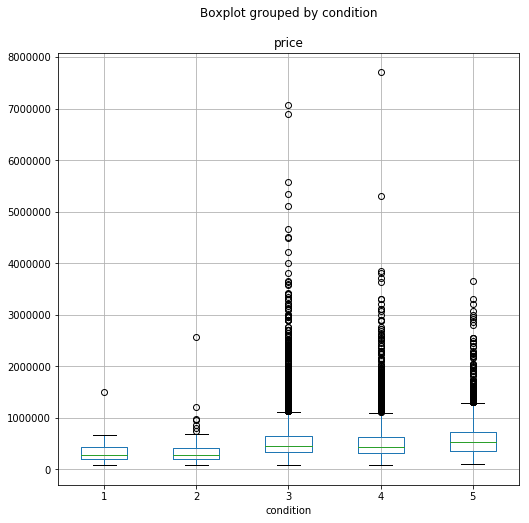

In [16]:
#Visualize categorical variables usingbox plot; identify outliers 
kc_data.boxplot('price',by = 'condition',figsize = (8,8))

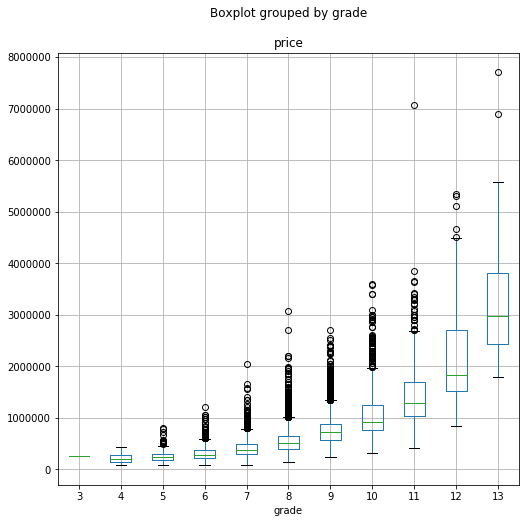

In [17]:
kc_data.boxplot('price',by = 'grade',figsize = (8,8))

In [18]:
#Look at distribution of column using groupby describe 
kc_data.groupby('condition').price.describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1,28.0,349480.357143,274653.006112,78000.0,194500.0,282500.0,434625.0,1500000.0
2,162.0,334005.487654,251024.562178,80000.0,191000.0,280000.0,403750.0,2560000.0
3,13900.0,543939.561223,365114.548430,83000.0,330000.0,452725.0,642112.5,7060000.0
4,5643.0,522310.528974,358422.636321,89000.0,305000.0,440000.0,626000.0,7700000.0
5,1687.0,613289.410788,411113.934798,110000.0,350000.0,529950.0,725000.0,3650000.0


In [20]:
kc_dummies = pd.concat([kc_data, condition_dummies, grade_dummies], axis = 1)
kc_dummies.drop(['condition','grade'],axis=1, inplace=True);

Use temporary regression to see impact of transformed categorical variable on R2

In [21]:
temp_reg_condition = ols(formula = 'price~condition_dummies',data=kc_dummies).fit()
temp_reg_condition.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     35.12
Date:                Thu, 20 Jun 2019   Prob (F-statistic):           2.77e-29
Time:                        10:36:14   Log-Likelihood:            -3.0481e+05
No. Observations:               21420   AIC:                         6.096e+05
Df Residuals:                   21415   BIC:                         6.097e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.495e+05   6.92e+04      5.047      0.000    2.14e+05    4.85e+05
condition_dummies[0] -1.547e+04    7.5e+04     -0.206      0.837   -1.62e+05    1.32e+05
condition_dummies[1]  1.945e+05   6.93e+04      2.806      0.005    5.86e+04     3.3e+05
condition_dummies[2]  1.728e+05   6.94e+04      2.490      0.013    3.68e+04    3.09e+05
condition_dummies[3]  2.638e+05   6.98e+04      3.779      0.000    1.27e+05    4.01e+05
==============================================================================
Omnibus:                    19064.760   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1159439.792
Skew:                           4.054   Prob(JB):                         0.00
Kurtosis:                      38.119   Cond. No.                         76.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

STEP 4: CLEAN DATA 

In [22]:
#Replace NaN values in waterfront column with mean value 
mean_waterfront = kc_dummies.waterfront.mean()
kc_dummies['waterfront'].fillna(0, inplace=True)

#Replace NAN values in view column with mean value 
mean_view = kc_dummies.view.mean()
kc_dummies['view'].fillna(mean_view, inplace=True)

#Replace NAN values in yr_renovated column with 0 as opposted to mean value as mean of year renovated 
#in NAN set would not be representative of the data
kc_dummies['yr_renovated'].fillna(0, inplace=True)

kc_dummies.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
condition_2      0
condition_3      0
condition_4      0
condition_5      0
grade_4          0
grade_5          0
grade_6          0
grade_7          0
grade_8          0
grade_9          0
grade_10         0
grade_11         0
grade_12         0
grade_13         0
dtype: int64

In [23]:
#Drop id column so that is it not used as a variable in the regression 
kc_data.drop(['id'],axis=1, inplace=True);

Run regression model 

In [24]:
regression_kc = ols(formula= "price~", data=kc_data).fit()
regression_kc.summary()

PatsyError: categorical data cannot be >1-dimensional